Libraries

In [2]:
import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing import seaborn as sns #Data Visualizaton
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearn
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn
from sklearn.model_selection import train_test_split #Split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Calculate Accuracy Score
import sklearn.metrics as metrics #Confusion Matrix

Import Dataset

In [3]:
df=pd.read_csv("flightdata.csv")

Dataset Analyses

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


Handling Missing Values

In [6]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

Data Visualization 

Text(0.5, 1.0, 'Scatter plot')

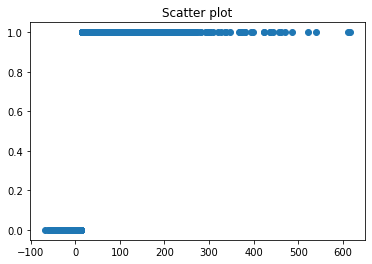

In [7]:
plt.scatter(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Scatter plot")

Text(0.5, 1.0, 'Bar Chart')

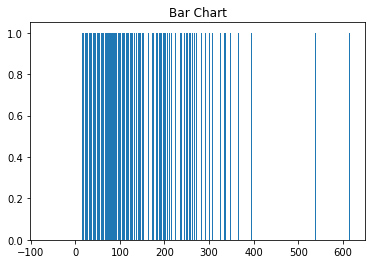

In [8]:
plt.bar(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Bar Chart")

Text(0.5, 1.0, 'Histogram')

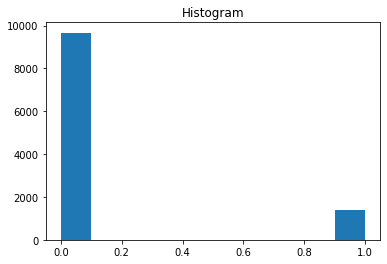

In [9]:
plt.hist(df['ARR_DEL15'])
plt.title("Histogram")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


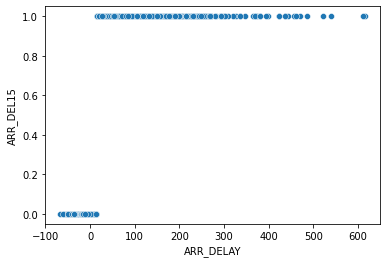

In [10]:
sns.scatterplot(df['ARR_DELAY'],df['ARR_DEL15'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


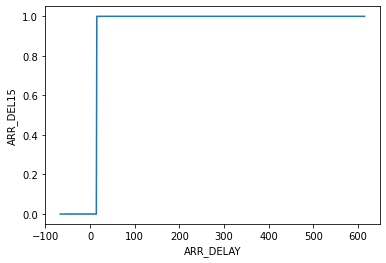

In [11]:
sns.lineplot(df['ARR_DELAY'],df['ARR_DEL15'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


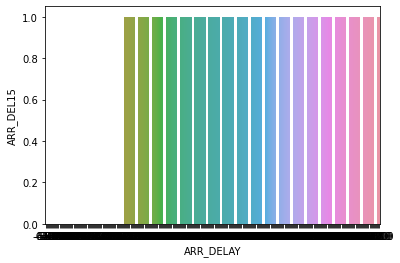

In [12]:
sns.barplot(df['ARR_DELAY'],df['ARR_DEL15'])

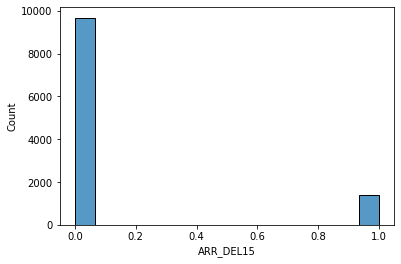

In [13]:
sns.histplot(df['ARR_DEL15'])

Droping Unnecessary Columns

In [14]:
X=df.drop(['YEAR','QUARTER','DAY_OF_WEEK','UNIQUE_CARRIER','DEP_DEL15','DEP_DELAY','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','DISTANCE','Unnamed: 25','ORIGIN','DEST'],axis='columns')
y=df['DEP_DEL15']

In [15]:
X[['DEP_TIME']]=X[['DEP_TIME']].fillna(X[['DEP_TIME']].mean())
X[['DEP_TIME']]=X[['DEP_TIME']].astype(int)

In [16]:
X

,MONTH,DAY_OF_MONTH,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME
0,1,1,N836DN,1399,10397,14747,1905,1907
1,1,1,N964DN,1476,11433,13487,1345,1344
2,1,1,N813DN,1597,10397,14747,940,942
3,1,1,N587NW,1768,14747,13487,819,820
4,1,1,N836DN,1823,14747,11433,2300,2256
...,...,...,...,...,...,...,...,...
11226,12,30,N940DL,1715,11433,10397,1005,1003
11227,12,30,N836DN,1770,14747,13487,1525,1559
11228,12,30,N583NW,1823,11433,14747,1959,1959
11229,12,30,N554NW,1901,10397,14747,1530,1529


In [17]:
y=y.fillna(y.mean())
y=y.astype(int)

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11226    0
11227    1
11228    0
11229    0
11230    0
Name: DEP_DEL15, Length: 11231, dtype: int64

Label Encoder

In [19]:
le_TAIL_NUM=LabelEncoder()
X['TAIL_NUMBER']=le_TAIL_NUM.fit_transform(X['TAIL_NUM'])

In [20]:
X=X.drop(['TAIL_NUM'],axis='columns')

In [21]:
X

,MONTH,DAY_OF_MONTH,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,TAIL_NUMBER
0,1,1,1399,10397,14747,1905,1907,470
1,1,1,1476,11433,13487,1345,1344,718
2,1,1,1597,10397,14747,940,942,429
3,1,1,1768,14747,13487,819,820,298
4,1,1,1823,14747,11433,2300,2256,470
...,...,...,...,...,...,...,...,...
11226,12,30,1715,11433,10397,1005,1003,648
11227,12,30,1770,14747,13487,1525,1559,470
11228,12,30,1823,11433,14747,1959,1959,294
11229,12,30,1901,10397,14747,1530,1529,288


Split Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7861, 8)
(3370, 8)
(7861,)
(3370,)
